<div style="background-color: #78E8A3; padding: 20px">
<h3>Project Scenario</h3>
<p>Exploration of various machine learning models to predict power plant output.</p> 
</div>

### Anatomy of a power plant
Combined cycle power plants (CCPP) are power plants that use gas and steam turbines together to generate electricity, compared to single turbines that only use gas. Waste heat from the gas turbine is used to create steam, which then is used with a steam turbine to generate more electricty.

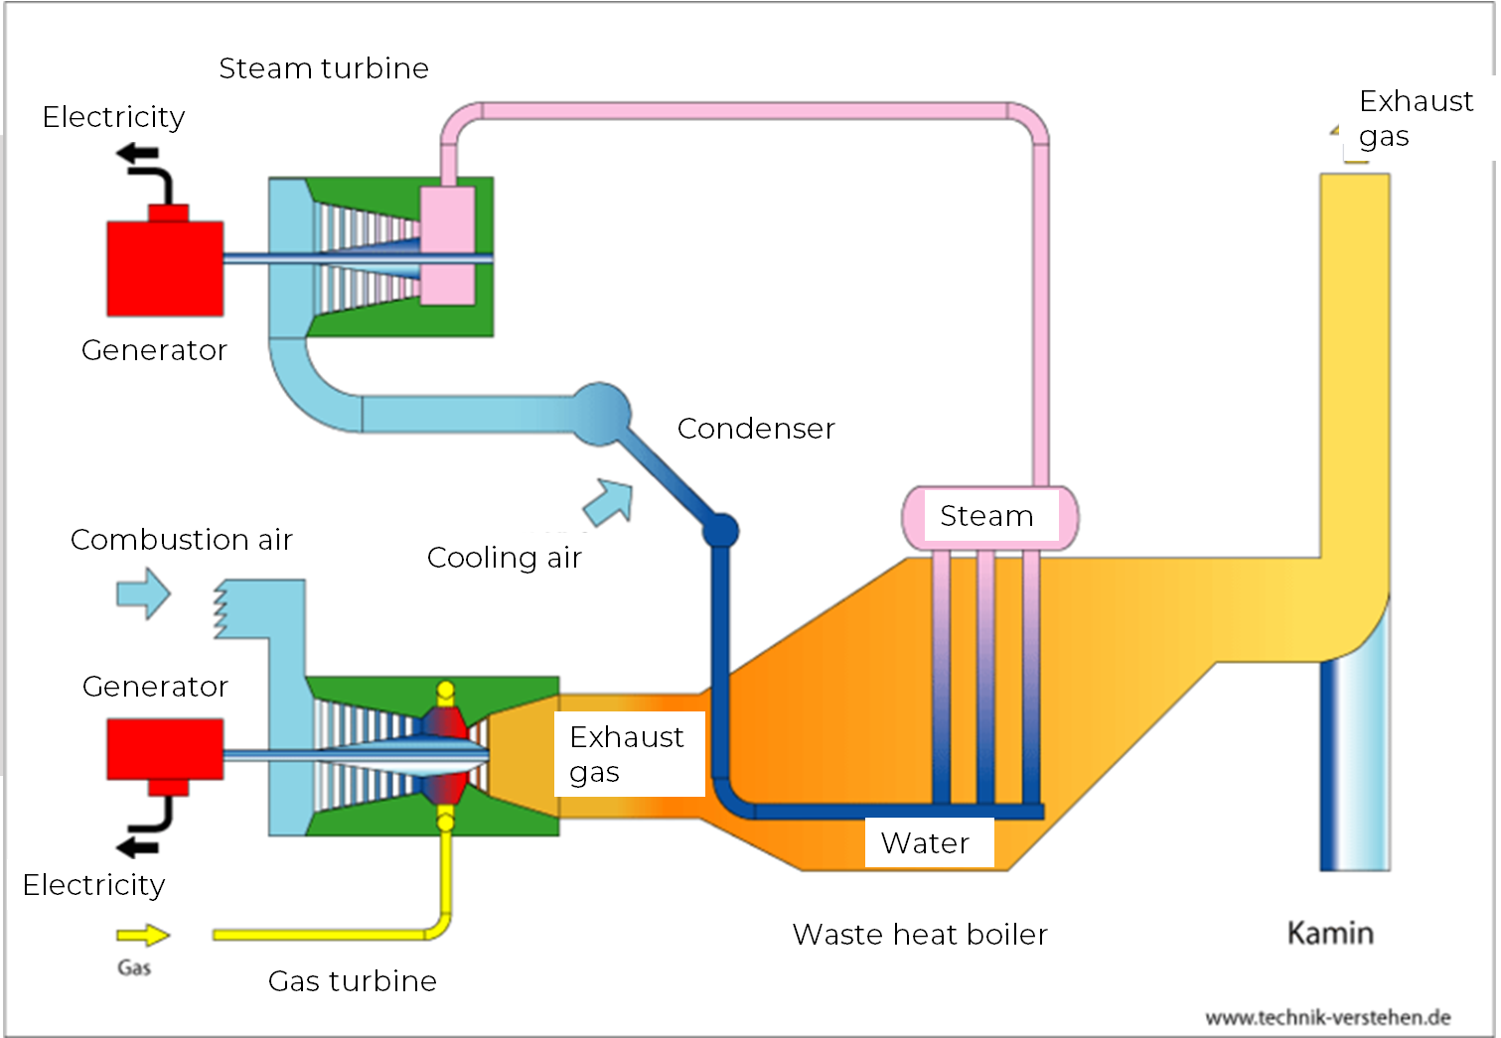

The output of CCPP (PE) depends on several factors, such as ambient temperature (AT), exhaust steam pressure (V), atmospheric pressure (AP), and relative humidity (RH). 

We will analyze the data of a particular power plant, and get a predictive model of the power plant at any time. 

### Part 1 - Import of libraries and data, clean up and EDA

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Folds5x2_pp.xlsx')
df.head(5)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

Univariate Analysis via histograms

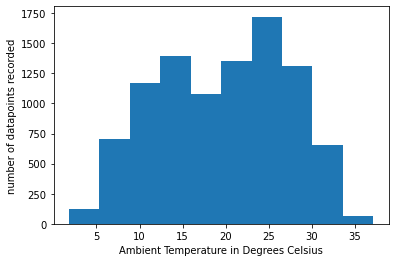

In [5]:
plt.hist(df['AT'])
plt.xlabel('Ambient Temperature in Degrees Celsius')
plt.ylabel('number of datapoints recorded')
plt.show()

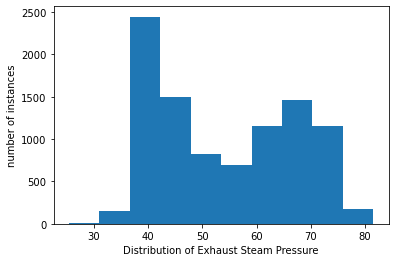

In [6]:
plt.hist(df['V'])
plt.xlabel('Distribution of Exhaust Steam Pressure')
plt.ylabel('number of instances')
plt.show()

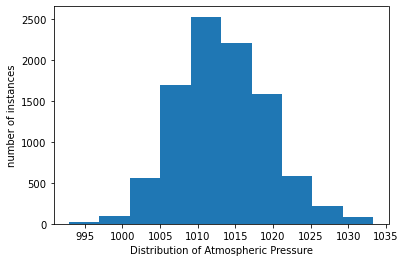

In [7]:
plt.hist(df['AP'])
plt.xlabel('Distribution of Atmospheric Pressure')
plt.ylabel('number of instances')
plt.show()

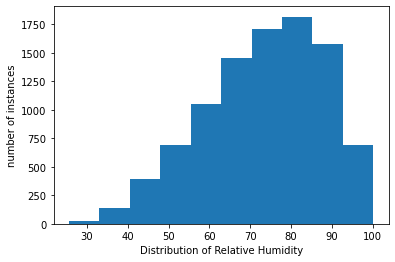

In [8]:
plt.hist(df['RH'])
plt.xlabel('Distribution of Relative Humidity')
plt.ylabel('number of instances')
plt.show()

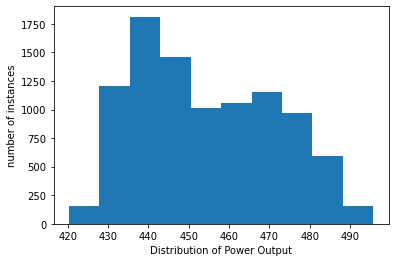

In [9]:
plt.hist(df['PE'])
plt.xlabel('Distribution of Power Output')
plt.ylabel('number of instances')
plt.show()

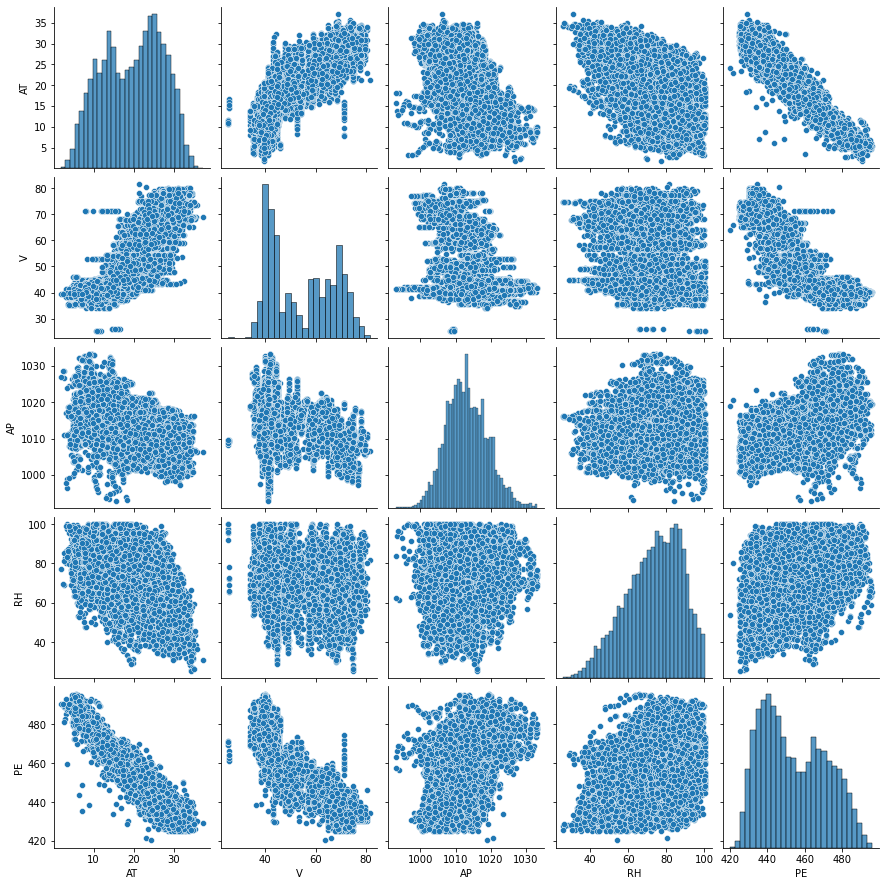

In [10]:
sns.pairplot(df)

### Part 2: Developing a Linear Regression Model

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Identify features for linear regression via pairwise correlation and calculation of Pearson correlation coefficient

In [12]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


high score between AT and PE is observed

Preparation of independent and independent variables

In that case, let's start with:

1. Declare a variable, and assign the indepedent variables to it, i.e. just take the 'AT' values from the DataFrame
2. Declare another variable, and assign the dependent variables to it, i.e. get only the 'PE' column values

In [13]:
X = df.iloc[:,:1].values #AT
y = df.iloc[:,-1:].values #PE

80/20 split for train and test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Model Training

In [15]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Assessment of prediction by model via scores

In [18]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rscore = r2_score(y_test, y_pred)
print(rmse)
print(rscore)

5.272562059337881
0.9049536175690114


Assessment of prediction by model via scatter plot

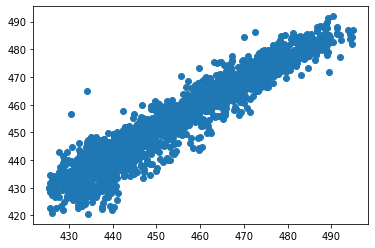

In [19]:
plt.scatter(y_test, y_pred)

Linear Regression with a full feature set

4.44226285844249
0.9325315554761303


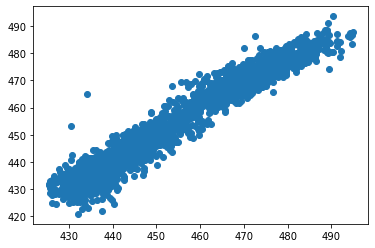

In [20]:
df2 = df[['AT','V','AP','RH']]
df2

X = df2.iloc[:,[0,1,2,3]].values
y = df.iloc[:,-1:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

rscore = r2_score(y_test, y_pred)
print(rscore)

plt.scatter(y_test, y_pred)

### Part 3: Prediction with other models

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Decision Tree

4.742392433984153
0.9231069355097035


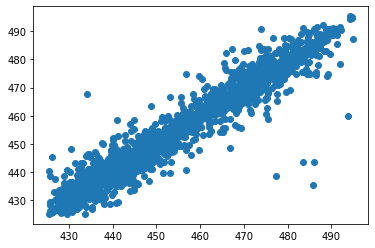

In [22]:
dtregressor = DecisionTreeRegressor()

dtregressor.fit(X_train, y_train)

y_pred = dtregressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

rscore = r2_score(y_test, y_pred)
print(rscore)

plt.scatter(y_test, y_pred)

Random Forest

<ipython-input-23-c530de5186b0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfregressor.fit(X_train, y_train)


3.1910633588529973
0.9651852688412677


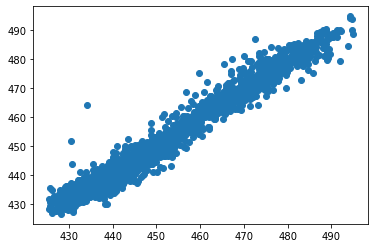

In [23]:
rfregressor = RandomForestRegressor()

rfregressor.fit(X_train, y_train)

y_pred = rfregressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

rscore = r2_score(y_test, y_pred)
print(rscore)

plt.scatter(y_test, y_pred)

RMSE has been reduced significantly and R2 score has significantly improved for a random forest model

Evaluate feature importance to see what features were used in building the model

In [24]:
print(rfregressor.get_params(deep=True))

print(rfregressor.feature_importances_)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
[0.90524437 0.05666329 0.01961948 0.01847286]


'AT' column had the most say in building the model, not unlike if we just used a linear regression with 'AT' values alone.